# Capstone Project Module 3 
## California Housing Price

**Contents**

1. Business Understanding
2. EDA and Preprocessing
3. Modelling
4. House Value Price vs Predicted Price
5. Conclusion and Recommendation for Future Work

## 1. Business Understanding
### Data used: California Housing Price

**Problem Statement and Purpose**

Setiap tahun bisnis properti di seluruh dunia menghadapi problem tentang bagaimana untuk menempatkan harga tiap-tiap properti yang mereka miliki. Tentunya ada berbagai macam hal yang bisa mempengaruhi nilai harga ini, dan para salesperson bisnis property ini juga tentunya harus memikirkan target pasar mereka juga. Tak lupa mereka juga harus memikirkan harga yang pas untuk bersaing dengan pemilik property lainnya. 
Tentunya masalah ini juga dialami oleh pemilik bisnis property di California. California adalah sebuah negara bagian di Amerika yang letaknya dekat dengan laut. Sehingga jenis letak properti di California juga banyak yang dekat dengan pesisir pantai. Dengan memikirkan lokasi California ini, para pemilik properti memerlukan model dan alat yang dapat membantu mereka memprediksi harga  properti yang dapat menarik minat klien mereka dan juga dapat bersaing dengan pemilik properti lainnya.

**Analytic Approach**

Tahap-tahapan analisa data yang dapat dilakukan untuk memecahkan masalah prediksi harga properti ini adalah:
-	Meneliti detail-detail fitur yang ada dalam dataset California Housing Price
-	Menemukan korelasi antara fitur-fitur dan target fitur harga
-	Menentukan model-model regresi yang akan digunakan
-	Membangun model yang dapat memprediksi harga yang bisa digunakan untuk menjual property dari pemilik properti di California

**Metric Evaluation**

Evaluasi metrik yang akan digunakan adalah RMSE, MAE, dan MAPE. Ketiga metrik ini dipilih karena ketiga evaluasi metrik ini berguna pada tahap membuat perbandingan performa model-model regresi yang digunakan. Hasil dari RMSE lebih mudah untuk dibandingkan karena RMSE adalah nilai hasil rata akar kuadrat dari error. Semakin kecil nilai hasil ketiga metrik ini, semakin akurat model dalam memprediksi harga properti yang diberikan. 


**Overall Data Information**
- Dataset merupakan data listing properti rumah di California.
- Setiap baris data merepresentasikan informasi terkait properti, letak secara geografisnya, .

**Attributes Information**

| **Attribute** | **Data Type** | **Description** |
| --- | --- | --- |
| longitude | float64 | Measure of how far west a house is |
| latitude  | float64 | Measure of how far north a house is |
| housing_median_age | float64 | Median age of a house within a block |
| total_rooms | float64 | Total number of rooms within a block
| total_bedrooms | float64 | Total number of bedrooms within a block
| population | float64 | Total number of people residing within a block
| households | float64 | Total number of households, a group of people residing within a home unit, for a block |
| median_income | float64 | Median income for households within a block of houses (measured in tens of thousands of US Dollars) |
| ocean_proximity | object | Location of the house w.r.t ocean/sea |
| median_house_value | float64 | Median house value for households within a block (measured in US Dollars) | 



In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

In [2]:
# Load dataset
ch_data = pd.read_csv('data_california_house.csv')
ch_data.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity,median_house_value
0,-119.79,36.73,52.0,112.0,28.0,193.0,40.0,1.9750,INLAND,47500.0
1,-122.21,37.77,43.0,1017.0,328.0,836.0,277.0,2.2604,NEAR BAY,100000.0
2,-118.04,33.87,17.0,2358.0,396.0,1387.0,364.0,6.2990,<1H OCEAN,285800.0
3,-118.28,34.06,17.0,2518.0,1196.0,3051.0,1000.0,1.7199,<1H OCEAN,175000.0
4,-119.81,36.73,50.0,772.0,194.0,606.0,167.0,2.2206,INLAND,59200.0


## 2. EDA and Preprocessing

**Explore basic informations about the data**

In [3]:
ch_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14448 entries, 0 to 14447
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           14448 non-null  float64
 1   latitude            14448 non-null  float64
 2   housing_median_age  14448 non-null  float64
 3   total_rooms         14448 non-null  float64
 4   total_bedrooms      14311 non-null  float64
 5   population          14448 non-null  float64
 6   households          14448 non-null  float64
 7   median_income       14448 non-null  float64
 8   ocean_proximity     14448 non-null  object 
 9   median_house_value  14448 non-null  float64
dtypes: float64(9), object(1)
memory usage: 1.1+ MB


In [4]:
ch_data.ocean_proximity.value_counts()

<1H OCEAN     6369
INLAND        4576
NEAR OCEAN    1879
NEAR BAY      1622
ISLAND           2
Name: ocean_proximity, dtype: int64

In [5]:
ch_data.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,14448.000000,14448.000000,14448.000000,14448.000000,14311.000000,14448.000000,14448.000000,14448.000000,14448.000000
mean,-119.566647,35.630093,28.618702,2640.132683,538.260709,1425.157323,499.508929,3.866667,206824.624516
std,2.006587,2.140121,12.596694,2191.612441,423.577544,1149.580157,383.098390,1.891158,115365.476182
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1451.000000,295.000000,784.000000,279.000000,2.570600,119600.000000
50%,-118.490000,34.260000,29.000000,2125.000000,435.000000,1165.000000,410.000000,3.539100,180000.000000
75%,-118.000000,37.710000,37.000000,3148.000000,647.000000,1724.000000,604.000000,4.736100,263900.000000
max,-114.310000,41.950000,52.000000,32627.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


Mean dari house value is 206824. Mediannya adalah 180000. Bisa dikatakan rata-rata rumah di California adalah rumah mewah (Luxury houses) 

In [6]:
ch_data.isna().sum() #counting total of missing values

longitude               0
latitude                0
housing_median_age      0
total_rooms             0
total_bedrooms        137
population              0
households              0
median_income           0
ocean_proximity         0
median_house_value      0
dtype: int64

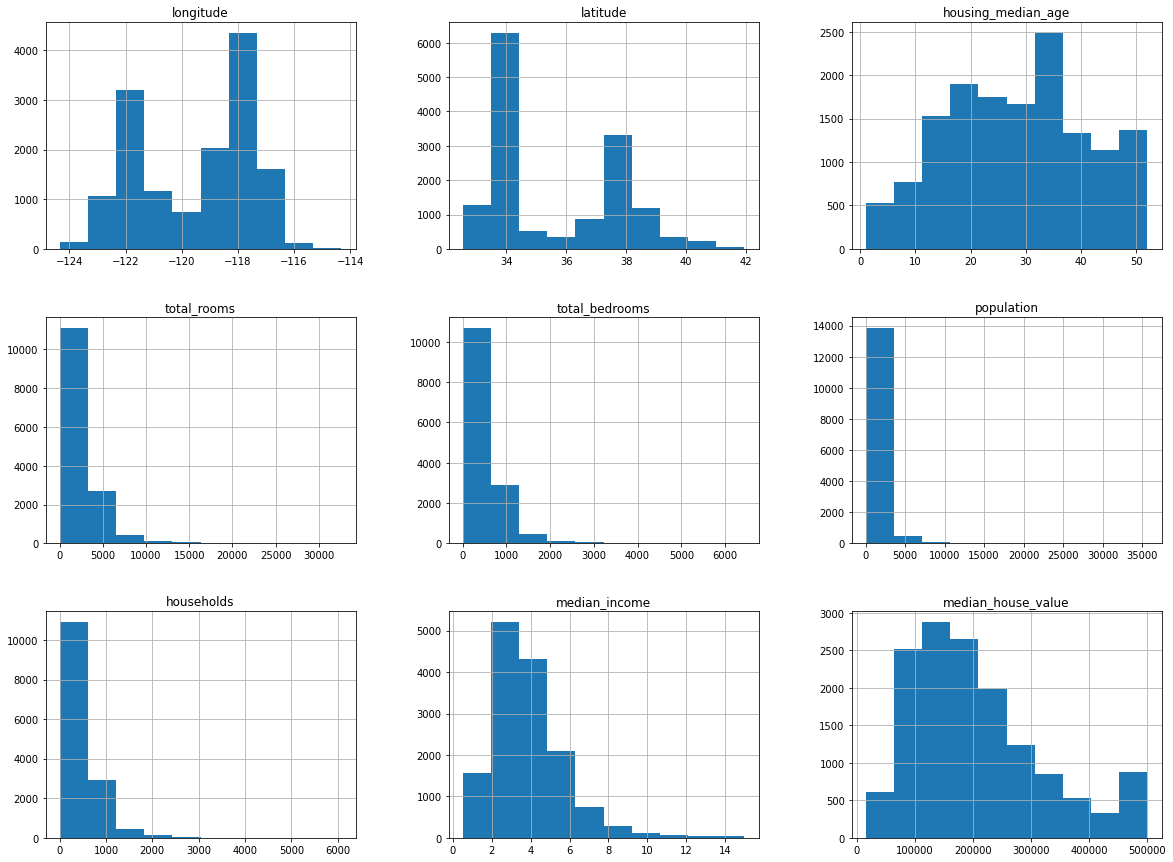

In [7]:
ch_data.hist(figsize=(20,15))
plt.show()

**Drop Missing Values**

In [8]:
#create new dataframe copy for eda to avoid messing with train and test set
ch_data_eda = ch_data.copy()

In [9]:
ch_data_eda.dropna(axis=0, inplace=True)

In [10]:
ch_data_eda.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 14311 entries, 0 to 14447
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           14311 non-null  float64
 1   latitude            14311 non-null  float64
 2   housing_median_age  14311 non-null  float64
 3   total_rooms         14311 non-null  float64
 4   total_bedrooms      14311 non-null  float64
 5   population          14311 non-null  float64
 6   households          14311 non-null  float64
 7   median_income       14311 non-null  float64
 8   ocean_proximity     14311 non-null  object 
 9   median_house_value  14311 non-null  float64
dtypes: float64(9), object(1)
memory usage: 1.2+ MB


**Overall General View**

In [11]:
listItem = []

for col in ch_data_eda.columns:
    listItem.append([col, 
                     ch_data_eda[col].dtype, 
                     ch_data_eda[col].isna().sum(), 
                     round((ch_data_eda[col].isna().sum()/len(ch_data_eda[col]))*100, 2),
                     ch_data_eda[col].nunique(), 
                     list(ch_data_eda[col].drop_duplicates().sample(2).values)]);

chdata_desc = pd.DataFrame(columns=['dataFeatures', 'dataType', 'null', 'nullPct', 'unique', 'uniqueSample'],
                     data=listItem)
chdata_desc

,dataFeatures,dataType,null,nullPct,unique,uniqueSample
0,longitude,float64,0,0.0,806,"[-121.53, -120.93]"
1,latitude,float64,0,0.0,835,"[36.97, 40.44]"
2,housing_median_age,float64,0,0.0,52,"[20.0, 33.0]"
3,total_rooms,float64,0,0.0,5213,"[1195.0, 4164.0]"
4,total_bedrooms,float64,0,0.0,1748,"[2279.0, 276.0]"
5,population,float64,0,0.0,3491,"[3131.0, 4375.0]"
6,households,float64,0,0.0,1646,"[3197.0, 726.0]"
7,median_income,float64,0,0.0,9726,"[4.1587, 4.1449]"
8,ocean_proximity,object,0,0.0,5,"[<1H OCEAN, ISLAND]"
9,median_house_value,float64,0,0.0,3540,"[298400.0, 55100.0]"


**Visualize the districts using longitude and latitude data**

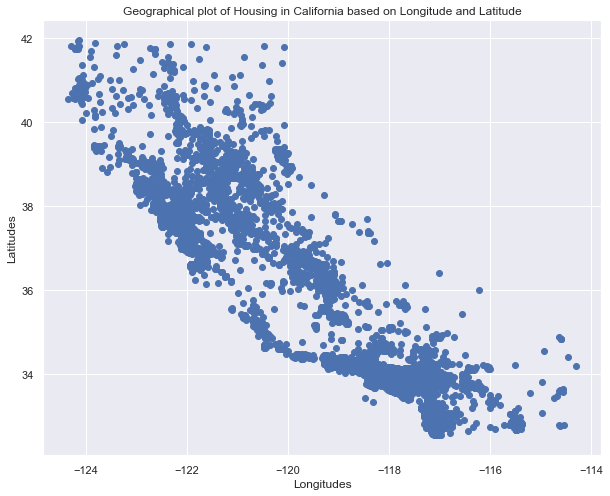

In [12]:
sns.set()
plt.figure(figsize=(10,8))
plt.scatter('longitude','latitude',data=ch_data_eda)
plt.ylabel('Latitudes')
plt.xlabel('Longitudes')
plt.title('Geographical plot of Housing in California based on Longitude and Latitude')
plt.show()

**Amount of houses of each ocean proximity**

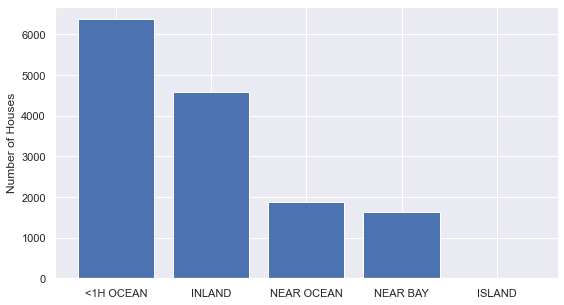

In [13]:
houses_per_prox = ch_data['ocean_proximity'].value_counts().reset_index().rename(
    columns={'index': 'ocean_proximity', 'ocean_proximity': 'n'}
)

plt.figure(figsize=(9,5))
plt.bar(x='ocean_proximity', height='n', data=houses_per_prox)
plt.ylabel('Number of Houses');

**Distribution of median house value**

<AxesSubplot:xlabel='median_house_value', ylabel='Density'>

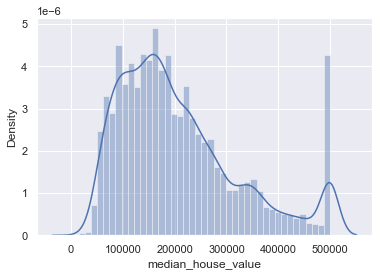

In [14]:
sns.distplot(ch_data_eda['median_house_value']) #right skewed

**Median House Value for each proximity**

In [15]:
hv_prox = ch_data_eda.groupby(by=['ocean_proximity']).agg({'median_house_value':'median'}).reset_index()
hv_prox = hv_prox.set_index('ocean_proximity')
hv_prox = hv_prox.sort_values('median_house_value', ascending =False)
hv_prox.head()

,median_house_value
ocean_proximity,
ISLAND,351100.0
NEAR BAY,230800.0
NEAR OCEAN,228100.0
<1H OCEAN,215100.0
INLAND,108800.0


**Check Outliers and Solution**

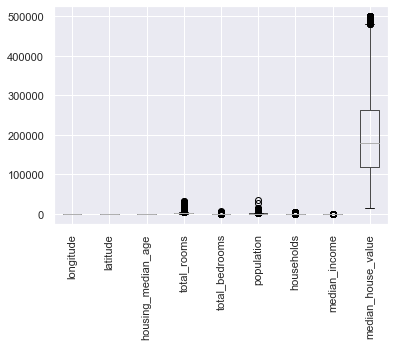

In [16]:
ch_data_eda.boxplot(rot=90); #total rooms, median house value, and population has recognizable outliers

Outliers yang ada di variable-variable dataset ini tidak begitu signifikan, dan karena jumlah data yang terhitung sedikit, lebih baik untuk disimpan. Tetapi ada spike yang cukup signifikan di variable 'median_house_value'. Karena dianggap dapat mempengaruhi hasil akhir modelling, row yg berisi outlier di variable median house value akan didrop.

In [17]:
out_val = ch_data_eda['median_house_value'].max() #value dimana outlier berada
out_val

500001.0

In [18]:
ch_data_eda.drop(ch_data_eda[ch_data_eda['median_house_value'] == out_val].index, inplace = True)

<AxesSubplot:>

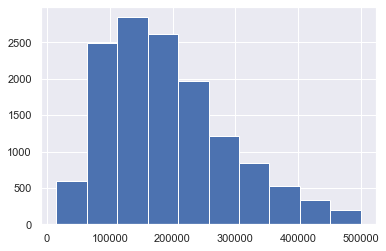

In [19]:
ch_data_eda['median_house_value'].hist() #value max sudah hilang

### **Feature Engineering**

Menambahkan beberapa fitur ke data:

- room_per_hh: Rata-rata kamar per rumah tangga. 
- bedroom_per_hh: Rata-rata kamar tidur per rumah tangga. (Dengan asumsi kamar tidur diluar hitungan kamar/fitur 'total_rooms').
- pop_per_hh: Rata-rata populasi per rumah tangga.

In [20]:
ch_data_eda['room_per_hh'] = ch_data_eda.total_rooms/ch_data_eda.households
ch_data_eda['bedroom_per_hh'] = ch_data_eda.total_bedrooms/ch_data_eda.households
ch_data_eda['pop_per_hh'] = ch_data_eda.population/ch_data_eda.households
ch_data_eda.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity,median_house_value,room_per_hh,bedroom_per_hh,pop_per_hh
0,-119.79,36.73,52.0,112.0,28.0,193.0,40.0,1.9750,INLAND,47500.0,2.800000,0.700000,4.825000
1,-122.21,37.77,43.0,1017.0,328.0,836.0,277.0,2.2604,NEAR BAY,100000.0,3.671480,1.184116,3.018051
2,-118.04,33.87,17.0,2358.0,396.0,1387.0,364.0,6.2990,<1H OCEAN,285800.0,6.478022,1.087912,3.810440
3,-118.28,34.06,17.0,2518.0,1196.0,3051.0,1000.0,1.7199,<1H OCEAN,175000.0,2.518000,1.196000,3.051000
4,-119.81,36.73,50.0,772.0,194.0,606.0,167.0,2.2206,INLAND,59200.0,4.622754,1.161677,3.628743


**Overall variable correlations with each other**

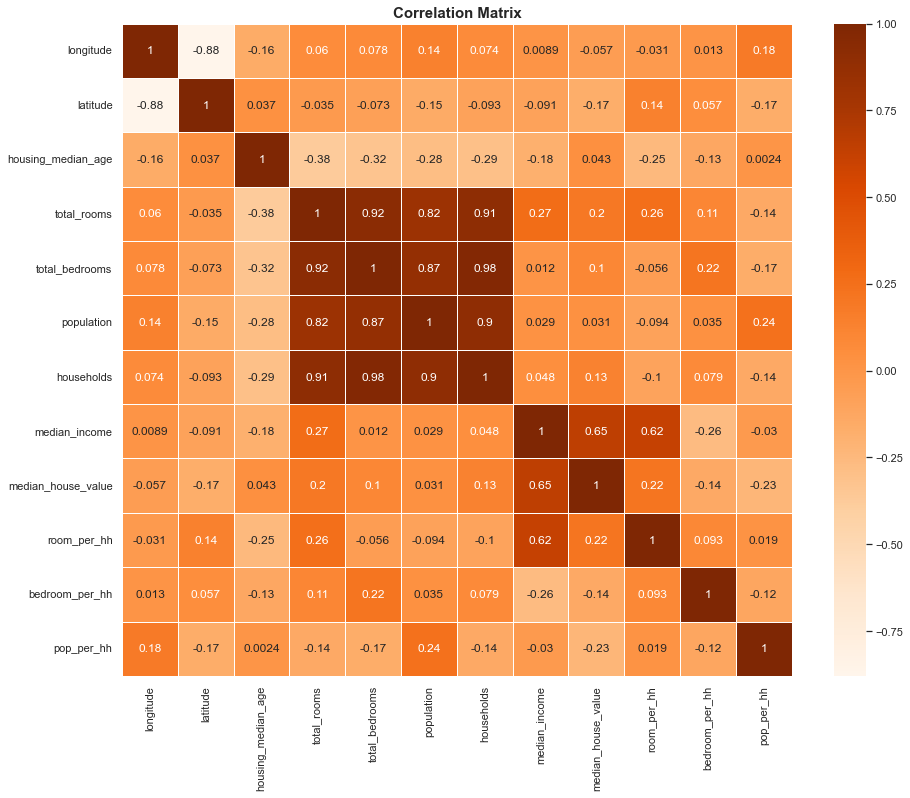

In [21]:
#target: median_house_value
plt.figure(figsize=(15, 12))
corr = ch_data_eda.corr(method='spearman')
sns.heatmap(corr, annot=True, linewidths=.5, cmap='Oranges')
plt.title('Correlation Matrix', size=15, weight='bold');

In [22]:
#clearer correlations to the target 
corr_matrix = ch_data_eda.corr()
corr_matrix.median_house_value.sort_values(ascending=False)

median_house_value    1.000000
median_income         0.646472
total_rooms           0.138285
room_per_hh           0.110740
households            0.089970
total_bedrooms        0.070598
housing_median_age    0.063610
population            0.008792
pop_per_hh           -0.027173
longitude            -0.042194
bedroom_per_hh       -0.057858
latitude             -0.151690
Name: median_house_value, dtype: float64

## 3. Modelling

In [23]:
#libraries required for modelling
from sklearn.model_selection import train_test_split, cross_val_score, RandomizedSearchCV, GridSearchCV, KFold

import category_encoders as ce
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from xgboost.sklearn import XGBRegressor
from sklearn.compose import TransformedTargetRegressor

from sklearn.preprocessing import StandardScaler

from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error, mean_absolute_percentage_error

**Encoding Ocean Proximity**

In [24]:
transformer = ColumnTransformer([
    ('One Hot', OneHotEncoder(drop='first', handle_unknown = 'ignore'), ['ocean_proximity']) 
], remainder='passthrough')

**Data Splitting**

In [25]:
#Seperate target from other variables
X = ch_data_eda.drop(['median_house_value'], axis=1)
y = ch_data_eda['median_house_value']

In [26]:
X_train, X_test, y_train, y_test = train_test_split(X, y,  test_size=0.3, random_state=42)

Model yang digunakan: 
- Linear Regression
- KNN Regressor
- XGBoost Regressor 

In [27]:
#benchmark model
lr = LinearRegression()
knn = KNeighborsRegressor()
xgb = XGBRegressor(random_state = 1)

Standard scaler digunakan karena dapat menjaga informasi yang berguna dari outliers.

In [28]:
#scaling (standard scaler)
scaler = StandardScaler()

Evaluasi metrik: Mean dan standard deviasi tiap metrik digunakan agar lebih jelas dalam membandingkan performa model. 

In [29]:
use_models = [lr, knn, xgb]

score_rmse = []
mean_rmse = []
std_rmse = []

score_mae = []
mean_mae = []
std_mae = []

score_mape = []
mean_mape = []
std_mape = []

**Cross Validation**

Cross Validation untuk melihat keseluruhan performa. 

In [30]:
for i in use_models:
    
    crossval = KFold(n_splits=3, shuffle=True, random_state=1)

    estimator = Pipeline([
        ('preprocessing', transformer),
        ('scaler', scaler),
        ('model', i)
    ])

    # RMSE
    model_cv_rmse = cross_val_score(
        estimator, 
        X_train, 
        y_train, 
        cv=crossval, 
        scoring='neg_root_mean_squared_error', 
        error_score='raise'
        )

    print(model_cv_rmse, i)

    score_rmse.append(model_cv_rmse)
    mean_rmse.append(model_cv_rmse.mean())
    std_rmse.append(model_cv_rmse.std())

    # MAE
    model_cv_mae = cross_val_score(
        estimator, 
        X_train, 
        y_train, 
        cv=crossval, 
        scoring='neg_mean_absolute_error', 
        error_score='raise'
        )

    print(model_cv_mae, i)

    score_mae.append(model_cv_mae)
    mean_mae.append(model_cv_mae.mean())
    std_mae.append(model_cv_mae.std())

    # MAPE
    model_cv_mape = cross_val_score(
        estimator, 
        X_train, 
        y_train, 
        cv=crossval, 
        scoring='neg_mean_absolute_percentage_error', 
        error_score='raise'
        )

    print(model_cv_mape, i)

    score_mape.append(model_cv_mape)
    mean_mape.append(model_cv_mape.mean())
    std_mape.append(model_cv_mape.std())

[-61171.09476536 -62740.72726088 -58698.38291006] LinearRegression()
[-45115.84008239 -45028.63715398 -43630.03253572] LinearRegression()
[-0.28205981 -0.27131803 -0.26587565] LinearRegression()
[-57419.25776317 -57511.89690332 -56970.41397745] KNeighborsRegressor()
[-40047.4838203  -39898.8434318  -39998.88749214] KNeighborsRegressor()
[-0.23474984 -0.22261374 -0.22699645] KNeighborsRegressor()
[-45845.45929315 -47025.783538   -43265.29792828] XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, gamma=None,
             gpu_id=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_to_onehot=None, max_delta_step=None, max_depth=None,
             max_leaves=None, min_child_weight=None, missing=nan,
             mo

In [31]:
eval_results = pd.DataFrame({
    'Model': ['Linear Regression', 'KNN Regressor', 'XGBoost Regressor'],
    'Mean_RMSE': mean_rmse,
    'Std_RMSE': std_rmse,
    'Mean_MAE': mean_mae,
    'Std_MAE': std_mae,
    'Mean_MAPE': mean_mape,
    'Std_MAPE': std_mape
})

eval_results

,Model,Mean_RMSE,Std_RMSE,Mean_MAE,Std_MAE,Mean_MAPE,Std_MAPE
0,Linear Regression,-60870.068312,1663.951052,-44591.503257,680.793923,-0.273084,0.006724
1,KNN Regressor,-57300.522881,236.466233,-39981.738248,61.881951,-0.228120,0.005018
2,XGBoost Regressor,-45378.846920,1570.267140,-31059.815316,785.631564,-0.180724,0.005759


Dari evaluation metrics yang digunakan, model-model yang baik untuk digunakan adalah:
- By MAPE: XGBoost Regressor
- By MAE: KNN Regressor
- By RMSE: KNN Regressor

Test set dengan KNN Regressor dan XGBoost Regressor

In [32]:
models = {
    'XGB': XGBRegressor(random_state=1),
    'KNN': KNeighborsRegressor()
}

rmse_sc = []
mae_sc = []
mape_sc = []

for i in models:

    model = Pipeline([
        ('preprocessing', transformer),
        ('scaler', scaler),
        ('model', models[i])
        ])

    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    rmse_sc.append(np.sqrt(mean_squared_error(y_test, y_pred)))
    mae_sc.append(mean_absolute_error(y_test, y_pred))
    mape_sc.append(mean_absolute_percentage_error(y_test, y_pred))

score_before_tuning = pd.DataFrame({'RMSE': rmse_sc, 'MAE': mae_sc, 'MAPE': mape_sc}, index=models.keys())
score_before_tuning

,RMSE,MAE,MAPE
XGB,45405.432282,30438.548380,0.177166
KNN,56309.989810,39206.359238,0.222250


Dari ketiga metric yang digunakan, XGBoost mempunyai nilai yang baik. Selanjutnya, XGBoost akan digunakan untuk hyperparameter tuning lebih lanjut. 

**Hyperparameter Tuning**

Untuk Hyperparameter tuning XGBoost, ada paramater booster tersendiri yang digunakan. Ada dua tipe booster untuk XGBoost, yaitu 'tree booster' dan 'linear booster'. Karena hasil tipe booster 'tree booster' lebih menghasilkan hasil yang baik dan lebih sering digunakan, tipe 'tree booster' akan digunakan. 

Hyperparameter yang akan digunakan adalah:
- max_depth (maksimum kedalaman pohon)
- gamma (menentukan pengurangan kerugian minimum yang diperlukan untuk splitting, membuat model menjadi lebih sederhana)
- learning rate (learning rate atau eta, untuk mencegah overfitting)
- n_estimators (jumlah pohon yang digunakan) 
- subsample (jumlah baris dari setiap pohon)
- cosample_bytree (rasio feature-feature yang digunakan untuk tiap pohon)
- reg_alpha & reg_lambda (regularisasi model, semakin besar nilainya semakin membuat model lebih sederhana)

In [33]:
max_depth = list(np.arange(1, 10))
learning_rate = [0.001, 0.01, 0.1, 0.2, 0.3]
n_estimators = list(np.arange(100, 200))
subsample = [0.5, 0.6, 0.7, 0.8, 0.9, 1.0]
gamma = [0, 0.25, 0.5, 1.0] 
colsample_bytree = [0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0]
reg_alpha = list(np.logspace(-3, 1, 10))
reg_lambda = [0.1, 1.0, 5.0, 10.0, 50.0, 100.0]

hyperparam_space_xgb = {
    'model__max_depth': max_depth, 
    'model__learning_rate': learning_rate,
    'model__n_estimators': n_estimators,
    'model__subsample': subsample,
    'model__gamma': gamma,
    'model__colsample_bytree': colsample_bytree,
    'model__reg_alpha': reg_alpha,
    'model__reg_lambda': reg_lambda
}

In [34]:
xgb = XGBRegressor(random_state=1, verbosity=0)

estimator_xgb = Pipeline([
        ('preprocessing', transformer),
        ('scaler', scaler),
        ('model', xgb)
        ])

crossval = KFold(n_splits=5, shuffle=True, random_state=1) #crossval dengan eval metric

random_xgb = RandomizedSearchCV(
    estimator_xgb, 
    param_distributions = hyperparam_space_xgb,
    n_iter = 50,
    cv = crossval, 
    scoring = ['neg_root_mean_squared_error', 'neg_mean_absolute_error', 'neg_mean_absolute_percentage_error'], 
    n_jobs = -1,
    refit = 'neg_mean_absolute_error',
    random_state = 1  
)

In [35]:
# Fitting data training untuk mencari parameter terbaik
random_xgb.fit(X_train, y_train)

RandomizedSearchCV(cv=KFold(n_splits=5, random_state=1, shuffle=True),
                   estimator=Pipeline(steps=[('preprocessing',
                                              ColumnTransformer(remainder='passthrough',
                                                                transformers=[('One '
                                                                               'Hot',
                                                                               OneHotEncoder(drop='first',
                                                                                             handle_unknown='ignore'),
                                                                               ['ocean_proximity'])])),
                                             ('scaler', StandardScaler()),
                                             ('model',
                                              XGBRegressor(base_score=None,
                                                           booster=None,
                                                           callbacks=None,
                                                           c...
                                                             0.021544346900318832,
                                                             0.05994842503189409,
                                                             0.1668100537200059,
                                                             0.46415888336127775,
                                                             1.2915496650148828,
                                                             3.593813663804626,
                                                             10.0],
                                        'model__reg_lambda': [0.1, 1.0, 5.0,
                                                              10.0, 50.0,
                                                              100.0],
                                        'model__subsample': [0.5, 0.6, 0.7, 0.8,
                                                             0.9, 1.0]},
                   random_state=1, refit='neg_mean_absolute_error',
                   scoring=['neg_root_mean_squared_error',
                            'neg_mean_absolute_error',
                            'neg_mean_absolute_percentage_error'])

In [36]:
#tuning result
pd.DataFrame(random_xgb.cv_results_).sort_values(by=['rank_test_neg_root_mean_squared_error', 'rank_test_neg_mean_absolute_error', 'rank_test_neg_mean_absolute_percentage_error']).head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_model__subsample,param_model__reg_lambda,param_model__reg_alpha,param_model__n_estimators,param_model__max_depth,param_model__learning_rate,...,std_test_neg_mean_absolute_error,rank_test_neg_mean_absolute_error,split0_test_neg_mean_absolute_percentage_error,split1_test_neg_mean_absolute_percentage_error,split2_test_neg_mean_absolute_percentage_error,split3_test_neg_mean_absolute_percentage_error,split4_test_neg_mean_absolute_percentage_error,mean_test_neg_mean_absolute_percentage_error,std_test_neg_mean_absolute_percentage_error,rank_test_neg_mean_absolute_percentage_error
22,4.379782,0.094816,0.033807,0.000748,1.0,100.0,10.0,180,9,0.1,...,710.075272,1,-0.176161,-0.173410,-0.169426,-0.164913,-0.165332,-0.169848,0.004415,1
6,4.189140,0.247232,0.039408,0.005886,1.0,50.0,0.16681,154,9,0.2,...,656.590601,2,-0.173896,-0.173174,-0.171246,-0.166478,-0.168378,-0.170634,0.002822,2
24,3.450575,0.044997,0.030207,0.002927,0.9,10.0,0.001,136,9,0.2,...,936.535108,3,-0.180669,-0.180897,-0.170825,-0.164478,-0.165360,-0.172446,0.007147,3
14,3.077691,0.130658,0.025406,0.001854,0.7,100.0,1.29155,120,9,0.2,...,670.565434,4,-0.181117,-0.178394,-0.175927,-0.171642,-0.171088,-0.175634,0.003857,4
10,3.011074,0.120115,0.033007,0.001674,0.9,5.0,10.0,152,9,0.2,...,865.584092,5,-0.187300,-0.185120,-0.175185,-0.170677,-0.172649,-0.178186,0.006741,5


Mencari skor dan hyperparameter terbaik dari tuning sebelumnya

In [37]:
print('XGBoost')
print('Best_score:', random_xgb.best_score_)
print('Best_params:', random_xgb.best_params_)

XGBoost
Best_score: -29376.251136949846
Best_params: {'model__subsample': 1.0, 'model__reg_lambda': 100.0, 'model__reg_alpha': 10.0, 'model__n_estimators': 180, 'model__max_depth': 9, 'model__learning_rate': 0.1, 'model__gamma': 1.0, 'model__colsample_bytree': 0.7}


**Evaluasi model sebelum dan sesudah tuning**

In [38]:
model = {'XGB': XGBRegressor(random_state=1)}

xgb_tuning = random_xgb.best_estimator_

xgb_tuning.fit(X_train, y_train)

#memakai test set
y_pred_xgb_tuning = xgb_tuning.predict(X_test)

rmse_xgb_tuning = np.sqrt(mean_squared_error(y_test, y_pred_xgb_tuning))
mae_xgb_tuning = mean_absolute_error(y_test, y_pred_xgb_tuning)
mape_xgb_tuning = mean_absolute_percentage_error(y_test, y_pred_xgb_tuning)

score_after_tuning = pd.DataFrame({'RMSE': rmse_xgb_tuning, 'MAE': mae_xgb_tuning, 'MAPE': mape_xgb_tuning}, index=model.keys())

In [39]:
display(score_before_tuning.loc['XGB'])
display(score_after_tuning)

RMSE    45405.432282
MAE     30438.548380
MAPE        0.177166
Name: XGB, dtype: float64

,RMSE,MAE,MAPE
XGB,43250.643399,28703.04249,0.168764


Ada peningkatan performa model setelah tuning. Nilai ketiga metric menjadi lebih kecil.
- RMSE: 45405.432282 --> 43250.643399
- MAE: 30438.548380 --> 28703.04249
- MAPE: 0.177166 --> 0.168764

## 4. House Value price vs Predicted price

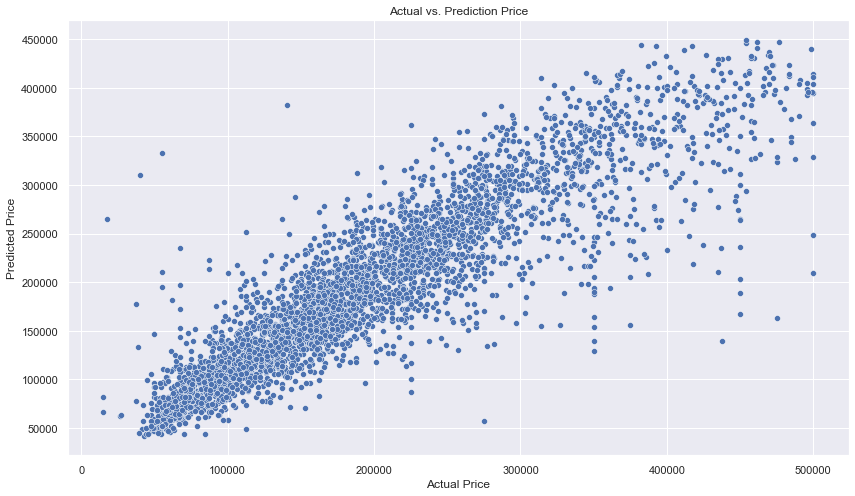

In [40]:
plt.figure(figsize=(14, 8))
plot = sns.scatterplot(x=y_test, y=y_pred_xgb_tuning).set(title='Actual vs. Prediction Price', 
                                               xlabel='Actual Price', 
                                               ylabel='Predicted Price');

Berdasarkan model, perbedaan antara harga aktual dan harga prediksi tidak terlalu jauh. Dikarenakan error pada evaluation metric RMSE dan MAE masih cukup tinggi, tetap terdapat nilai prediksi yang berbeda jauh dengan nilai aktualnya. Akan tetapi, nilai MAPE pada model ini adalah 17%, sehingga dapat dikategorikan sebagai 'good forecast' (Lewis, 1982).

Source: Lewis, C. D. (1982). Industrial and business forecasting methods: A practical guide to exponential smoothing and curve fitting

**Feature Importance**

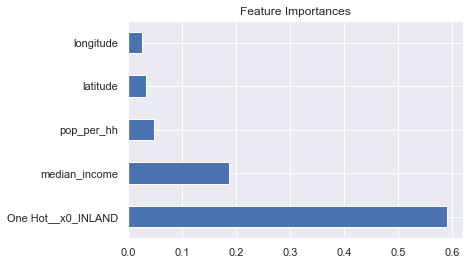

In [41]:
feature_imp = pd.Series(xgb_tuning['model'].feature_importances_, transformer.get_feature_names()).sort_values(ascending = False).head()
feature_imp.plot(kind='barh', title='Feature Importances');

## 5. Conclusion and Reccomendation for Future Work

Berdasarkan hasil feature importance, feature 'median_income' dan 'ocean_proximity' menjadi feature yang mempengaruhi feature target 'median_house_value'. Meski secara metrik MAPE model ini bisa dikatakan sesuai tujuan, secara metrik RMSE dan MAE nilainya masih sedikit kurang baik. Perbedaan harga prediksi masih mempunyai kemungkinan untuk meleset. Nilai kedua metrik tersebut adalah 43250 dan 28703, sehingga perbedaan antara harga prediksi dan aktualnya bisa meleset dari 30000 dolar US sampai dengan 40000 dolar US. Adanya feature-feature lain yang tidak termasuk dalam data set ini juga bisa menjadi hal yang mempengaruhi mengapa model belum cukup akurat untuk memprediksi harga. 

Rekomendasi untuk meningkatkan performa model lebih lanjut:
- Mencoba metode dan model-model regresi lainnya seperti Bayesian Regression yang sering dipakai untuk analisa data harga, mirip dengan analisa data kali ini.
- Mencoba metode tuning lainnya seperti menggunakan library hyperopt untuk meningkatkan performa.

In [42]:
#save model dengan pickle
import pickle

est = Pipeline([('preprocess', transformer), ('model', XGBRegressor())])
est.fit(X_train, y_train)

pickle.dump(est, open('ANCPM3_California_House.sav', 'wb'))

In [43]:
#to load model
filename = 'ANCPM3_California_House.sav'
load_model = pickle.load(open(filename, 'rb'))

In [45]:
eval = np.sqrt(mean_squared_error(y_test, load_model.predict(X_test)))